# <span id="toc">  Esercizio 11 - Regressioni tramite Neural Network </span>

- [Esercizio 11.1](#ex011_1)

- [Esercizio 11.2](#ex011_2)

- [Esercizio 11.3](#ex011_3)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
from IPython.display import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

In questo esercizio l'obiettivo è quello di eseguire una regressione tramite machine learning su dati rumorosi utilizzando una **Neural Network (NN)**. 
Cercherò di capire in che modo i parametri del modello influenzino la capità della rete neurale di fittare una serie di dati e perchè sia complicato eseguire delle predzioni. 

Si considera un processo probabilistico che fornisce coppie di dati $(x, y)$, generati campionando l'equazione:

$$
y_i = f(x_i) + \eta_i,
$$

dove $f(x_i)$ è una funzione sconosciuta, e $\eta_i$ è una variabile casuale gaussiana, non correlata, tale che:

$$
\langle \eta_i \rangle = 0 \qquad \langle \eta_i \eta_j \rangle = \delta_{ij}\sigma
$$

Per fare previsioni, si considera una rete neurale che dipende dai suoi parametri, pesi e bias. Le funzioni che la NN può modellare rappresentano la classe di modelli con cui si cercherà di approssimare i dati e fare predizioni.

Per apprendere i parametri della NN, si allenano i modelli su un "training" set e poi si testa l’efficacia della rete su un "validation" set, cioè un insieme di dati differenti così che si possa riuscire a fare previsioni accurate anche du dati nuovi.

La performance della rete neurale può essere valutata confrontando le predizioni $y_j^{\text{pred}}$ con i valori reali $y_j$ e una metrica spesso utilizzata è l’errore quadratico medio (MSE), definito sul test set come:

$$
MSE = \frac{1}{N_{\text{test}}} \sum_{j=1}^{N_{\text{test}}} (y_j^{\text{pred}} - y_j)^2
$$

Infine, si cercherà di ottenere una visione qualitativa tramite l’analisi grafica dei dati predetti dal modello rispetto al target.

## <span id="ex011_1">  Esercizio 11.1 </span>[^](#toc)

In questo esercizio considero il caso semplice di funzione lineare del tipo:

$$
f(x)=2x+1
$$

nel dominio $x \in [-1,1]$ ed eseguo tentativi di fit su di essa tramite una rete neurale sequenziale.

Viene implementata una rete a un solo neurone: essa è sufficiente perché ogni neurone per definizione riceve un input $x$ e restituisce un output $y=wx+b$, dove $w$ e $b$ rappresentano rispettivamente un peso e un bias, e sono i parametri che il modello dovrà calibrare.

L'obiettivo è quello di capire come le qualità del fit e delle previsioni del modello dipendano dai parametri:
- Numero di epoche $N_{\mathrm{epochs}}$
- Numero di dati di train $N_{\mathrm{train}}$
- Rumore $\sigma$

Per questa prima simulzione ho usato $N_{\mathrm{valid}} = 50$, $N_{\mathrm{epochs}} = 30$, $N_{\mathrm{train}} = 500$ e $\sigma = 0.2$.

In [2]:
# Target parameters of f(x) = m*x + b
m = 2 
b = 1 

# NN parameters
N_valid = 50
N_epochs = 30
N_train = 500 
sigma = 0.2
 
np.random.seed(0)

x_train = np.random.uniform(-1, 1, N_train)        # Generate training inputs
x_valid = np.random.uniform(-1, 1, N_valid)        # Generate validation inputs
x_valid.sort()

y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma) 

y_target = m * x_valid + b                         # Target linear function

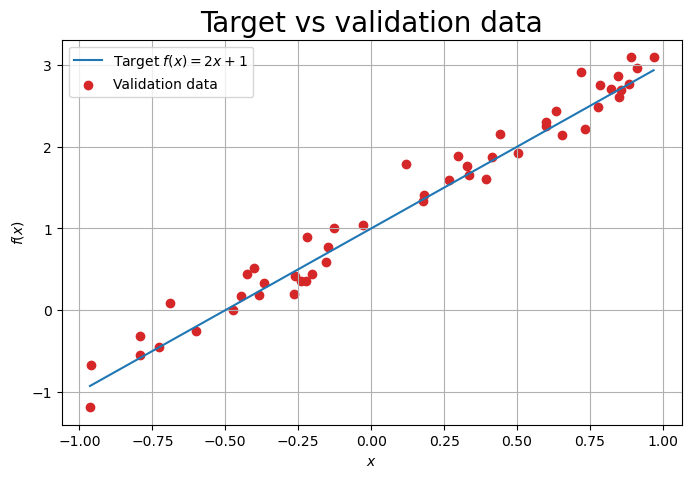

In [3]:
# Target vs validation data
plt.figure(figsize=(8,5))

plt.plot(x_valid, y_target, label='Target $f(x) = 2x + 1$')
plt.scatter(x_valid, y_valid, color='tab:red', label='Validation data')
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$f(x)$', fontsize=10)
plt.title('Target vs validation data', fontsize=20)
plt.grid(True)
plt.legend()

plt.show()

In questo grafico riporto il confronto tra la funzione target teorica e i dati di validazione generati.
Questo confronto serve come punto di partenza: mostra la differenza tra la legge esatta e i dati rumorosi che la rete neurale dovrà imparare ad approssimare.

Costruisco ora la rete neurale, addestrandola per il problema lineare. In particolare definisco un singolo layer 
con un solo neurone, che prende in ingresso la variabile $x$.

In [4]:
opt = 'sgd'    # Optimizer
lf = 'mse'     # Loss function

# Compose the NN model
model = Sequential()
# Input variable x
model.add(Input(shape=(1,)))
# Single output layer with 1 neuron, directly connected to the input
model.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer=opt, loss=lf, metrics=['mse'])

# Fit the model using training dataset
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, verbose=0, 
          validation_data=(x_valid, y_valid))

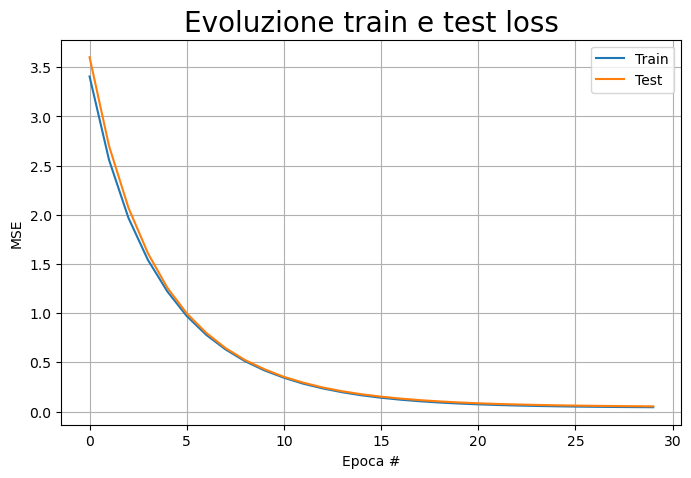

Performance del modello:
Test loss =  0.05251963436603546

Performance del modello con la curva esatta:
Test loss =  0.005043066572397947


In [5]:
# Train and test loss
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.ylabel('MSE', fontsize=10)
plt.xlabel('Epoca #', fontsize=10)
plt.title('Evoluzione train e test loss', fontsize=20)
plt.grid(True)
plt.legend()

plt.show()

print('Performance del modello:')
# Evaluate model
mse = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss = ', mse[0])
print()
# Evaluate model with the exact curve
print('Performance del modello con la curva esatta:')
mse = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss = ', mse[0])

Il grafico mostra l’andamento della funzione di loss MSE durante l’addestramento, sul training set e sul validation (test) set.  

All’inizio l’errore è elevato, perché il peso $w$ e il bias $b$ della rete sono inizializzati casualmente. Con l’aumentare  delle epoche entrambe le curve decrescono rapidamente e si stabilizzano vicino a zero.  

Questo comportamento indica che il modello riesce a ricostruire correttamente la retta target e il fatto che le due curve restino vicine mostra che non c’è overfitting, quindi la rete generalizza bene anche sui dati non visti.  

Infine confrontando i valori di loss, si nota che che la "Loss test" (rispetto ai dati di validazione) risulta più alta della "Loss target" (rispetto al target): la prima riflette la presenza del rumore nei dati iniziali, mentre la seconda conferma che la rete ha appreso correttamente la legge lineare sottostante.

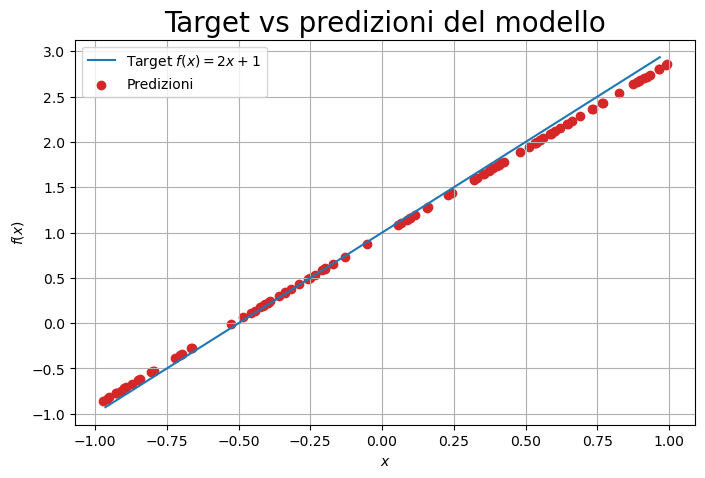

In [6]:
# Target vs predizioni
plt.figure(figsize=(8,5))

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted, verbose=0)

plt.plot(x_valid, y_target, label='Target $f(x) = 2x + 1$')
plt.scatter(x_predicted, y_predicted, color='tab:red', label='Predizioni')
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$f(x)$', fontsize=10)
plt.title('Target vs predizioni del modello', fontsize=20)
plt.grid(True)
plt.legend()

plt.show()

Dal grafico si osserva che i punti predetti dal modello coincidono quasi perfettamente con la retta teorica, segno che l’allenamento ha portato i parametri ad assumere valori vicini a quelli esatti $w=2$ e $b=1$.
Questo risultato conferma che la rete neurale è in grado di apprendere una relazione lineare di questo tipo, riproducendo fedelmente la funzione target.

### Variazione dei parametri della NN

Di seguito ho provato a costruire delle reti neurali variando di volta in volta uno dei parametri tra $N_{\mathrm{epochs}}$, $N_{\mathrm{train}}$ e $\sigma$, tenendo fissi gli altri due e valutando di volta in volta le performance in termini di test loss.

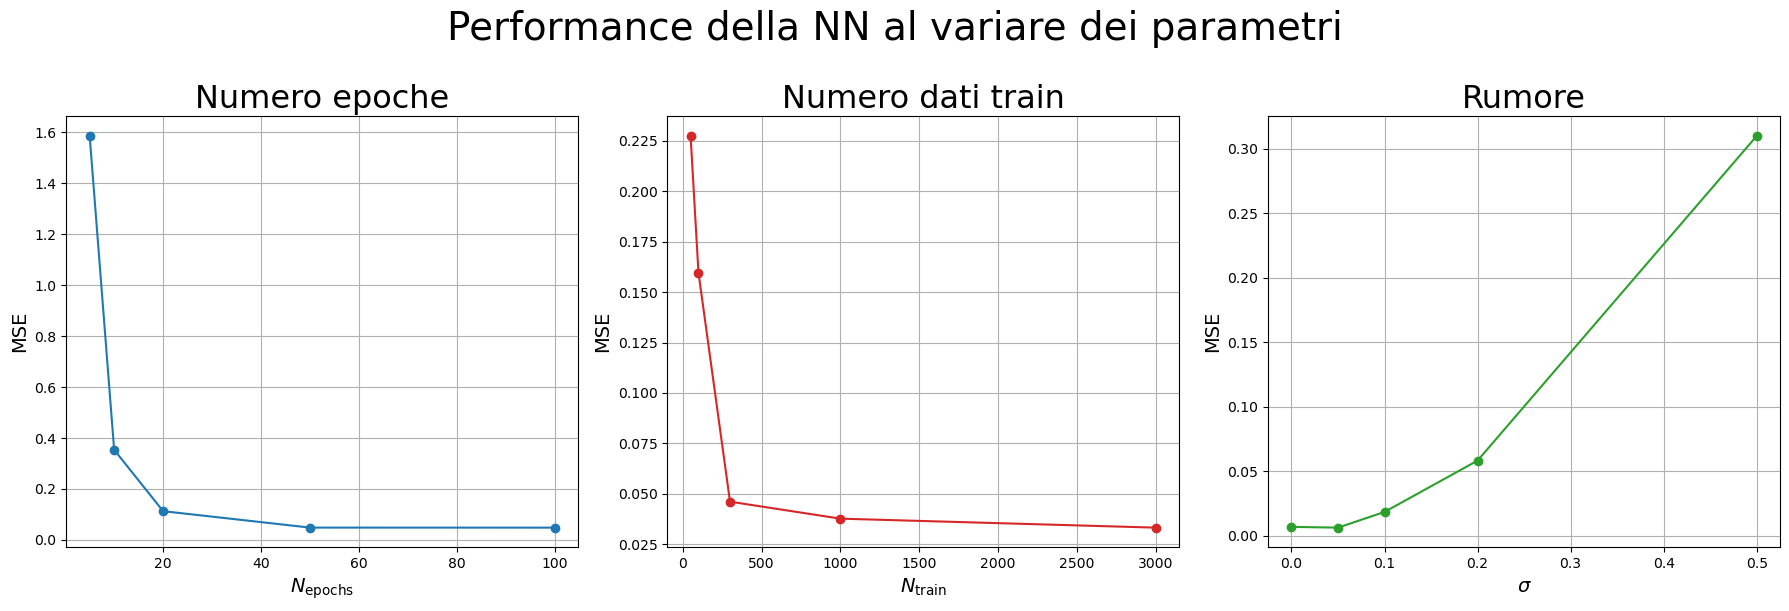

In [7]:
# Variazione dei parametri
def run(N_epochs, N_train, sigma):
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, N_train)
    y_train = np.random.normal(m * x_train + b, sigma)
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = Sequential()
    model.add(Input(shape=(1,)))
    model.add(Dense(1))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    model.fit(x_train, y_train,
              batch_size=32, epochs=N_epochs,
              shuffle=True, verbose=0,
              validation_data=(x_valid, y_valid))

    mse = model.evaluate(x_valid, y_valid, verbose=0)[0]
    return mse

# Lista parametri
N_epochs_list = [5, 10, 20, 50, 100]
N_train_list = [50, 100, 300, 1000, 3000]
sigma_list = [0.0, 0.05, 0.1, 0.2, 0.5]

mse_N_epochs = [run(ne, 500, 0.2) for ne in N_epochs_list]
mse_N_train = [run(30, nt, 0.2) for nt in N_train_list]
mse_sigma  = [run(30, 500, sg) for sg in sigma_list]

fig, axs = plt.subplots(1,3,figsize=(18, 6))
fig.suptitle('Performance della NN al variare dei parametri', fontsize=28, y=1.01)

# Epoche
axs[0].plot(N_epochs_list, mse_N_epochs, 'o-', color='tab:blue')
axs[0].set_xlabel('$N_{\mathrm{epochs}}$', fontsize=14)
axs[0].set_ylabel('MSE', fontsize=14)
axs[0].set_title('Numero epoche', fontsize=23)
axs[0].grid(True)

# Dati train
axs[1].plot(N_train_list, mse_N_train, 'o-', color='tab:red')
axs[1].set_xlabel('$N_{\mathrm{train}}$', fontsize=14)
axs[1].set_ylabel('MSE', fontsize=14)
axs[1].set_title('Numero dati train', fontsize=23)
axs[1].grid(True)

# Rumore
axs[2].plot(sigma_list, mse_sigma, 'o-', color='tab:green')
axs[2].set_xlabel('$\sigma$', fontsize=14)
axs[2].set_ylabel('MSE', fontsize=14)
axs[2].set_title('Rumore', fontsize=23)            
axs[2].grid(True)
            
plt.tight_layout()
plt.show()

Dai tre grafici si osserva che:  

- Poche epoche non sono sufficienti per convergere, ma già con $\approx 50$ epoche la loss si stabilizza.  
- Con pochi campioni di train il modello non riesce a generalizzare e la loss è alta.
- Maggiore rumore nei dati porta inevitabilmente a una loss più alta, poiché la rete non può ricostruire perfettamente la legge sottostante. Se il rumore è nullo i dati cadono esattamente sulla funzione target e la rete può imparare la legge senza errori, portando la loss a zero. Tuttavia introdurre del rumore serve a testare la capacità del modello di generalizzare, inoltre in assenza di esso una rete troppo complessa rischia di andare incontro a overfitting.

Questi risultati mostrano chiaramente il compromesso tra quantità di dati, qualità dei dati e tempo di addestramento, parametri che vanno bilanciati per ottenere prestazioni ottimali.

## <span id="ex011_2">  Esercizio 11.2 </span>[^](#toc)

In questo esercizio ho esteso il modello precedente per ottenere un fit ragionevole del polinomio di terzo grado:

$$
f(x)=4-3x-2x^2+3x^3
$$
nel dominio $x \in [-1,1]$.

Per fare ciò è necessario trovare scelte ragionevoli per:
- Numero di layer
- Numero di neuroni in ciascun layer
- Funzione di attivazione
- Ottimizzatore
- Funzione di loss

Di seguito riporto gli stessi passaggi eseguiti nel punto precedente, questa volta usando $N_{\mathrm{valid}} = 200$, $N_{\mathrm{epochs}} = 50$, $N_{\mathrm{train}} = 2000$ e $\sigma = 0.1$.

In [8]:
# Target parameters of f(x) = d + cx + bx^2 +ax^3
a = 3 
b = -2
c = -3
d = 4

def f(x):
    return a*x**3 + b*x**2 + c*x + d

# NN parameters
N_valid = 200
N_epochs = 50
N_train = 2000 
sigma = 0.1
 
np.random.seed(0)

x_train = np.random.uniform(-1, 1, N_train)   # Generate training inputs
x_valid = np.random.uniform(-1, 1, N_valid)   # Generate validation inputs
x_valid.sort()

y_train = np.random.normal(f(x_train), sigma) 
y_valid = np.random.normal(f(x_valid), sigma) 

y_target = f(x_valid)                         # Target linear function                                            

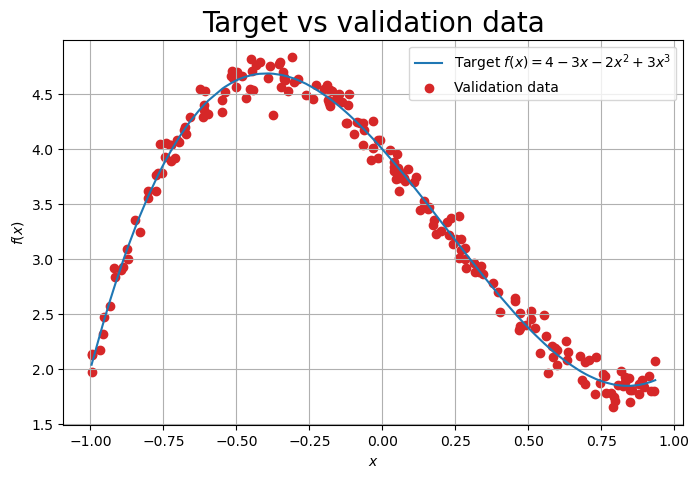

In [9]:
# Target vs validation data
plt.figure(figsize=(8,5))

plt.plot(x_valid, y_target, label='Target $f(x)=4-3x-2x^2+3x^3$')
plt.scatter(x_valid, y_valid, color='tab:red', label='Validation data')
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$f(x)$', fontsize=10)
plt.title('Target vs validation data', fontsize=20)
plt.grid(True)
plt.legend()

plt.show()

Per costruire una rete neurale in grado di ottenere un fit di un polinomio di terzo grado come quello in esame, non basta più un singolo neurone: servono più "layer" e più "neuroni" che, combinati, riescano a costruire curve non lineari.

Ogni layer con funzione di attivazione introduce una non linearità che permette alla rete di modellare andamenti curvi. Aumentantando il numero di neuroni si amplia lo spazio di funzioni che la rete può rappresentare, migliorando la capacità di adattarsi a funzioni complesse.

Una buona scelta come funzione di attivazione è `tanh`, perché permette di approssimare curve lisce come i polinomi e come ottimizzatore ho scelto `adam`, che garantisce una convergenza più rapida e stabile rispetto a `sgd`.
Come funzione di loss ho scelto nuovamente la `mse`.

In [10]:
act = 'tanh'   # Activation function
opt = 'adam'   # Optimizer
lf = 'mse'     # Loss function

# Compose the NN model
model = Sequential()
# Input x
model.add(Input(shape=(1,)))
# First layer with 32 neurons, each connected to the input
model.add(Dense(32, activation=act))
# Second layer with 16 neurons, each connected to the 32 outputs of the previous layer
model.add(Dense(16, activation=act))
# Third layer with 8 neurons, each connected to the 16 outputs of the previous layer
model.add(Dense(8, activation=act))
# Output layer with 1 neurons, connected to the 8 outputs of the previous layer
model.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer=opt, loss=lf, metrics=['mse'])

# Fit the model using training dataset
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, verbose=0, 
          validation_data=(x_valid, y_valid))

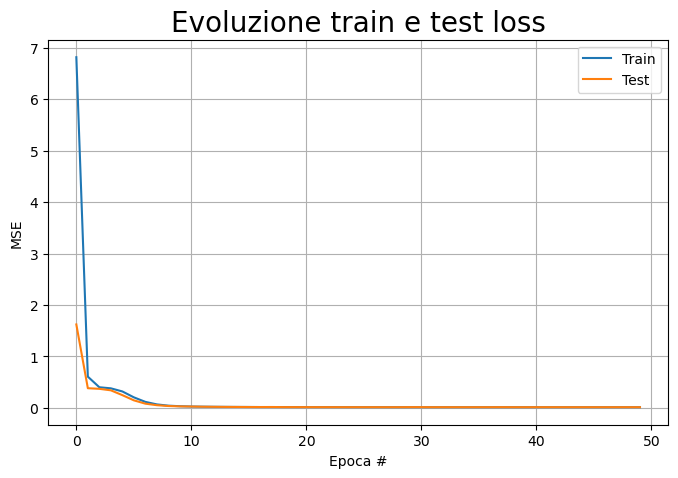

Performance del modello:
Test loss =  0.011378883384168148

Performance del modello con la curva esatta:
Test loss =  0.0007755676051601768


In [11]:
# Train and test loss
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.ylabel('MSE', fontsize=10)
plt.xlabel('Epoca #', fontsize=10)
plt.title('Evoluzione train e test loss', fontsize=20)
plt.grid(True)
plt.legend()

plt.sho
# Evaluate model with the exact curve
print('Performance del modello con la curva esatta:')
mse = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss = ', mse[0])

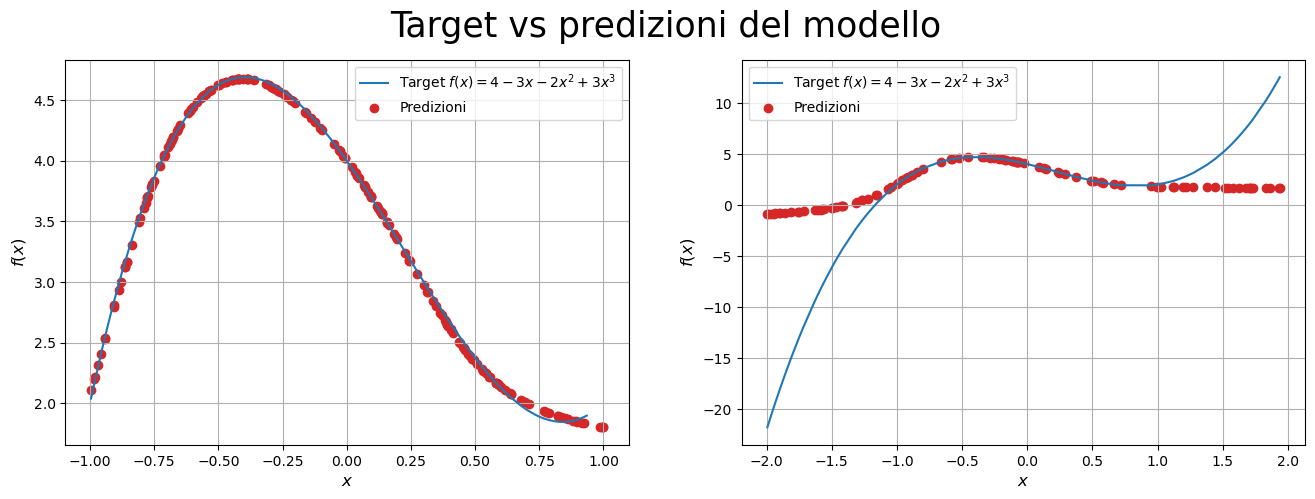

Performance del modello:
Loss test =  0.011378883384168148
Loss target =  0.0007755676051601768


In [12]:
# Target vs predizioni
plt.figure(figsize=(16,5))
plt.suptitle('Target vs predizioni del modello', fontsize=25)

x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted, verbose=0)

plt.subplot(1,2,1)
plt.plot(x_valid, f(x_valid), label='Target $f(x)=4-3x-2x^2+3x^3$')
plt.scatter(x_predicted, y_predicted, color='tab:red', label='Predizioni')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$f(x)$', fontsize=12)
plt.grid(True)
plt.legend()

x_predicted = np.random.uniform(-2, 2, 100)
x_predicted.sort()
y_predicted = model.predict(x_predicted, verbose=0)

plt.subplot(1,2,2)
plt.plot(x_predicted, f(x_predicted), label='Target $f(x)=4-3x-2x^2+3x^3$')
plt.scatter(x_predicted, y_predicted, color='tab:red', label='Predizioni')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$f(x)$', fontsize=12)
plt.grid(True)
plt.legend()

# Salvataggio plot
#os.makedirs('plots', exist_ok=True)
#plt.savefig('plots/tanh.png', bbox_inches="tight")

plt.show()

# Evaluate model
print('Performance del modello:')
mse = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Loss test = ', mse[0])
# Evaluate model with the exact curve
mse = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Loss target = ', mse[0])

Per i parametri scelti, le predizioni della rete neurale risultano in buon accordo con la funzione target all’interno dell’intervallo di training, con una loss pari a $MSE \approx 0.01$.

In particolare, rispetto al caso lineare, qui è stato necessario utilizzare più epoche ($N_{\mathrm{epochs}} = 50$)  e un numero maggiore di dati di training ($N_{\mathrm{train}} = 2000$), poichè la funzione da apprendere è più complessa e questo richiede una rete con maggiore capacità e un addestramento più lungo per convergere.  

Si nota inoltre nel grafico di destra che al di fuori del range di training le predizioni non seguono più il target: questo perché le rete neurale impara a fittare bene i dati nell’intervallo visto durante il training, ma non ha informazioni sufficienti per prevedere correttamente l’andamento della funzione oltre quel dominio.

### Variazione del numero di layer e neuroni

Diminuendo il numero di layer e di neuroni con cui costruisco la rete, la capacità predittiva del modello viene ridotta.
Questo significa che la rete non ha più abbastanza parametri per rappresentare l’andamento curvo della funzione target.

Il risultato è che le predizioni mostrano un underfitting: la rete impara solo una versione troppo semplificata della funzione e non riesce più a fittare correttamente la curva teorica.
<img src="plots/less_neurons.png" width="50%"/>

### Variazione della funzione di attivazione e dell'ottimizzatore

Provando a cambiare ottimizzatore non ho riscontrato grandi differenze nelle performance.  

Ho provato anche a variare la funzione di attivazione e ho ottenuto i seguenti risultati:

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="plots/relu.png" width="50%"/>
  <img src="plots/softmax.png" width="50%"/>
</div>

Nel grafico a sinistra ho utilizzato come funzione di attivazione `relu`, con cui ho ottenuto un risultato molto simile a quello visto trovato con `tanh` e una loss sempre intorno a $MSE \approx 0.01$. 

Nel grafico a destra invece ho utilizzato `softmax`, che evidentemente non è adatta a un problema di regressione di questo tipo, ottenendo una loss $MSE \approx 0.31$.

## <span id="ex011_3">  Esercizio 11.3 </span>[^](#toc)

In questo esercizio ho esteso il modello per ottenere un fit di una funzione bidimensionale del tipo:

$$
f(x,y)=\sin(x^2+y^2)
$$

nel dominio $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$, questa volta usando $N_{\mathrm{valid}} = 1000$, $N_{\mathrm{epochs}} = 50$, $N_{\mathrm{train}} = 8000$ e $\sigma = 0.1$.

In [13]:
def f(x, y):
    return np.sin((x*x + y*y))

# NN parameters
N_valid = 1000
N_epochs = 50
N_train = 8000 
sigma = 0.1

np.random.seed(0)

l = 3./2.
x_train = np.random.uniform(-l, l, N_train)           # Generate training inputs
y_train = np.random.uniform(-l, l, N_train) 
xy_train = np.column_stack((x_train, y_train))

x_valid = np.random.uniform(-l, l, N_valid)           # Generate validation inputs
y_valid = np.random.uniform(-l, l, N_valid)
xy_valid = np.column_stack((x_valid, y_valid))

z_train = np.random.normal(f(x_train,y_train), sigma)    
z_valid = np.random.normal(f(x_valid,y_valid), sigma) 

z_target = f(x_valid, y_valid)                        # Target linear function                                               

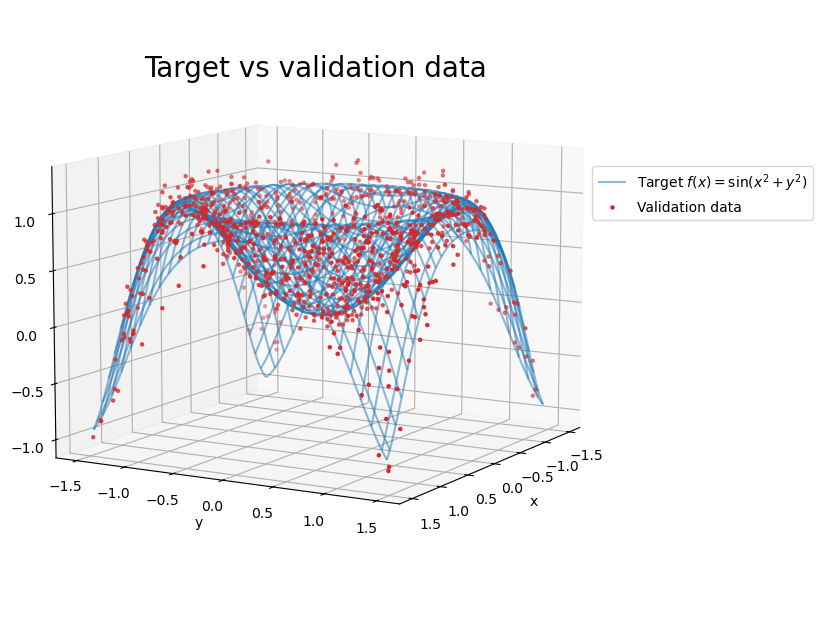

In [14]:
fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-l,l, 0.05)
y_surf = np.arange(-l,l, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, f(X_surf,Y_surf), alpha = 0.5, label='Target $f(x)=\sin(x^2+y^2)$')
ax.scatter(x_valid, y_valid, z_valid, marker = '.', color = 'tab:red', label='Validation data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Target vs validation data', fontsize=20, y=0.95)
ax.view_init(10, 30)
ax.legend(bbox_to_anchor=(0.95, 0.75))

plt.show()

In [15]:
act = 'tanh'   # Activation function
opt = 'adam'   # Optimizer
lf = 'mse'     # Loss function

# Compose the NN model
model = Sequential()
# Input x
model.add(Input(shape=(2,)))
# First layer with 32 neurons, each connected to the input
model.add(Dense(32, activation=act))
# Second layer with 16 neurons, each connected to the 32 outputs of the previous layer
model.add(Dense(16, activation=act))
# Third layer with 8 neurons, each connected to the 16 outputs of the previous layer
model.add(Dense(8, activation=act))
# Output layer with 1 neurons, connected to the 8 outputs of the previous layer
model.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer=opt, loss=lf, metrics=['mse'])

# Fit the model using training dataset
history = model.fit(x=xy_train, y=z_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, verbose=0, 
          validation_data=(xy_valid, z_valid))

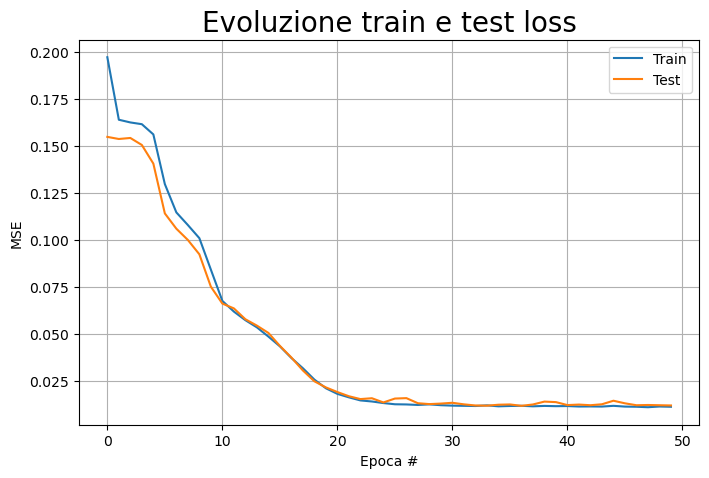

Performance del modello:
Test loss =  0.011854014359414577

Performance del modello con la curva esatta:
Test loss =  0.001153668388724327


In [16]:
# Train and test loss
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.ylabel('MSE', fontsize=10)
plt.xlabel('Epoca #', fontsize=10)
plt.title('Evoluzione train e test loss', fontsize=20)
plt.grid(True)
plt.legend()

plt.show()

print('Performance del modello:')
# Evaluate model
mse = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=0)
print('Test loss = ', mse[0])
print()
# Evaluate model with the exact curve
print('Performance del modello con la curva esatta:')
mse = model.evaluate(xy_valid, z_target, batch_size=32, verbose=0)
print('Test loss = ', mse[0])

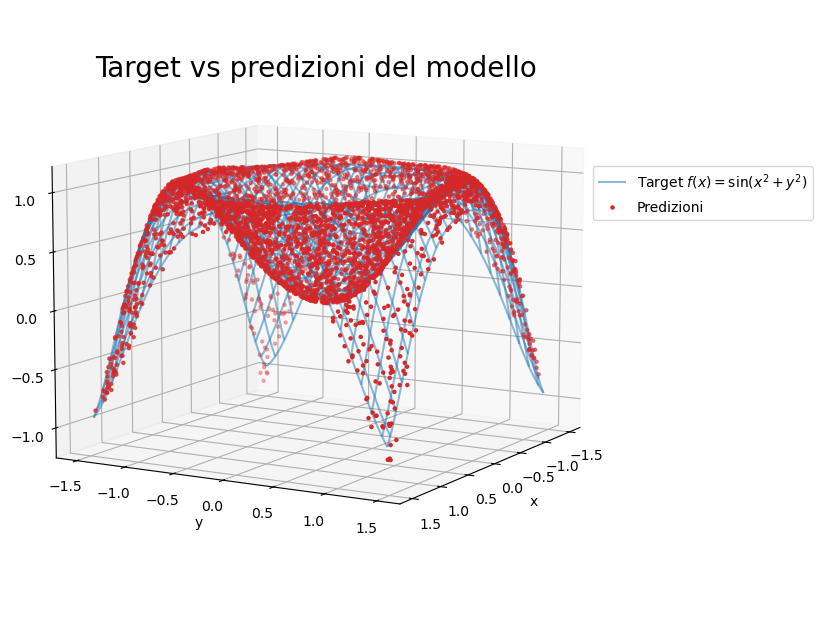

In [17]:
fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

x_predicted = np.random.uniform(-l, l, 4000)           
y_predicted = np.random.uniform(-l, l, 4000)
xy_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(xy_predicted, verbose=0).ravel()  

x_surf = np.arange(-l,l, 0.05)
y_surf = np.arange(-l,l, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, f(X_surf,Y_surf), alpha = 0.5, label='Target $f(x)=\sin(x^2+y^2)$')
ax.scatter(x_predicted, y_predicted, z_predicted, marker = '.', color = 'tab:red', label='Predizioni')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Target vs predizioni del modello', fontsize=20, y=0.95)
ax.view_init(10, 30)
ax.legend(bbox_to_anchor=(0.95, 0.75))

# Salvataggio plot
#os.makedirs('plots', exist_ok=True)
#plt.savefig('plots/8000_train.png', bbox_inches="tight")

plt.show()

Anche per questo fit ho riutilizzato la funzione di attivazione `tanh` e ottimizzatore `adam`.
Usando anche la stessa architettura del caso precedente, in termine di numero di layer e neuroni, si ottengono risultati soddisfacenti. 

Le predizioni della rete neurale risultano in buon accordo con la funzione target, con una loss pari a $MSE \approx 0.01$.
Questo indica che la rete è sufficientemente potente per riprodurre anche un andamento bidimensionale non banale come quello della funzione proposta.  

Tuttavia, è stato necessario aumentare in modo sensibile il numero di dati di training rispetto al caso precedente, fino a $N_{\mathrm{train}} = 8000$.
In due dimensioni infatti, lo spazio da esplorare è molto più ampio rispetto al caso unidimensionale e servono quindi più campioni per coprire adeguatamente il dominio e consentire alla rete di imparare la forma corretta della superficie.

Qui sotto riporto i risultati ottenuti mantenendo $N_{\mathrm{train}} = 2000$, in cui si può notare che usando un numero non sufficiente di dati di training la rete non è in grado di generalizzare su tutto il dominio, causando un evidente underfitting.

<img src="plots/2000_train.png" width="70%"/>